In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
class BaldwinOptimize_Coding:
    
    def __init__(self,initial_points, spikeness, population_size=1000):
        self.current_points = initial_points
        self.good_gene = np.array([i%2 for i in range(20)])
        self.spikeness = spikeness
        self.score = []
        self.correct_ratio = []
        self.undecide_ratio = []
        self.incorrect_ratio = []
        self.good_cutoff = 0.5
        self.generation = 0
        self.population_size = population_size
        
        self.fitness_score = self.fitness(self.current_points)
        self.score.append(np.sum(self.fitness_score>=self.good_cutoff)/self.population_size) # Good Genotype fraction
        tmp_correct_ratio = np.sum(self.current_points == self.good_gene)/(20*self.population_size) # Corrrect Gene fraction
        tmp_undecide_ratio = np.sum(self.current_points == 2)/(20*self.population_size)  # Undecided Gene fraction
        self.correct_ratio.append(tmp_correct_ratio.copy()) 
        self.undecide_ratio.append(tmp_undecide_ratio.copy())
        self.incorrect_ratio.append(1-tmp_correct_ratio.copy()-tmp_undecide_ratio.copy())
        
        #TODO: Add Assertion about the dimension here
        
    def fitness(self, patterns=None):
        hamming_distance = np.sum(patterns != self.good_gene, axis=-1)
        return (1./self.spikeness)**hamming_distance
        
    #TODO: Make this parallel    
    def learning(self,n_steps=1000):
        cut_off = self.good_cutoff
        fitness_function = self.fitness
        
        #TODO: make this function parallel
        def random_trail(start_point):
            w = np.argwhere(start_point==2).reshape(-1)
            if len(w) == 0:
                if fitness_function(start_point)>=cut_off:
                    return 1.
                else:
                    return 0
            for i in range(n_steps):
                tmp_pattern = start_point.copy()
                tmp_pattern[w] = np.random.randint(2,size=len(w))
                if fitness_function(tmp_pattern) >= cut_off:
                    break
            return (n_steps-i-1.)/n_steps
        
        self.learning_score = np.array([random_trail(point) for point in self.current_points])
    
    def competition(self, alpha=1, beta=19):
        if beta > 0:
            self.reproducibility = alpha*self.fitness_score + beta*self.learning_score + 1e-6
            self.reproducibility = self.reproducibility/np.sum(self.reproducibility)
        else:
            self.reproducibility = self.fitness_score + 1e-6
            self.reproducibility = self.reproducibility/np.sum(self.reproducibility)
    
    def selectivity(self):
        self.parent_index = np.random.choice(self.population_size,size=[self.population_size,2], p=self.reproducibility)
    
    def recombination(self):
        offsprings = []
        for i in range(self.population_size):
            mid = np.random.randint(1,19)
            tmp_offspring = np.concatenate((self.current_points[self.parent_index[i,0],0:mid],self.current_points[self.parent_index[i,1],mid:]))
            offsprings.append(tmp_offspring)
        self.current_points = np.array(offsprings)
               
    def evolve(self, alpha=1, beta=19, learning_nsteps=1000):
        '''
        Evolve for one generation
        alpha: scale for fitness effect
        beta: scale for learning effect
        '''
        self.fitness_score = self.fitness(self.current_points)
        if beta > 0:
            self.learning(n_steps=learning_nsteps)
            self.competition(alpha=alpha, beta=beta)
        else:
            self.competition(alpha=1,beta=0)
        self.selectivity()
        self.recombination()
        self.generation += 1
        self.evaluate()
    
    def evaluate(self):
        self.fitness_score = self.fitness(self.current_points)
        self.score.append(np.sum(self.fitness_score>=self.good_cutoff)/self.population_size) # Good Genotype fraction
        tmp_correct_ratio = np.sum(self.current_points == self.good_gene)/(20*self.population_size) # Corrrect Gene fraction
        tmp_undecide_ratio = np.sum(self.current_points == 2)/(20*self.population_size)  # Undecided Gene fraction
        self.correct_ratio.append(tmp_correct_ratio.copy()) 
        self.undecide_ratio.append(tmp_undecide_ratio.copy())
        self.incorrect_ratio.append(1-tmp_correct_ratio.copy()-tmp_undecide_ratio.copy())

In [91]:
test = np.sign(np.random.rand(*BOC.current_points.shape) - 1e-4)
test_index = np.where(test == -1)
BOC.current_points[test_index]

array([], dtype=int64)

In [96]:
len(test_index[0])

0

In [59]:
BOC.current_points

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 2, 0, ..., 1, 0, 1]])

In [62]:
test_index

(array([ 34, 106, 163, 169, 277, 285, 340, 409, 424, 522, 549, 569, 621,
        656, 696, 700, 708, 710, 713, 743, 772, 862, 923, 952]),
 array([14,  0, 14, 14,  7, 17,  5,  9, 17, 17,  4, 14, 16, 10,  3,  0,  1,
         2, 18,  0,  0,  8, 19, 19]))

In [77]:
def flip(x):
    new = []
    for i in x:
        if i==0:
            new.append(np.random.choice([1,2]))
        elif i==1:
            new.append(np.random.choice([0,2]))
        elif i==2:
            new.append(np.random.choice([0,1]))
    return np.array(new)

In [75]:
BOC.current_points[test_index]

array([1, 0, 2, 1])

In [87]:
BOC.current_points[test_index] = flip(BOC.current_points[test_index])

In [88]:
BOC.current_points[test_index]

array([0, 2, 1, 2])

array([], dtype=int64)

In [3]:
initial_points = np.random.choice(3,size=[1000,20],p=[0.25,0.25,0.50])

In [4]:
BOC = BaldwinOptimize_Coding(initial_points,2.5)

In [11]:
for i in tqdm(range(25)):
    BOC.evolve(alpha=1,beta=19)

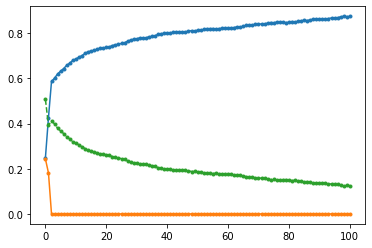

In [12]:
plt.plot(BOC.correct_ratio,'.-')
plt.plot(BOC.incorrect_ratio,'.-')
plt.plot(BOC.undecide_ratio,'.--')
plt.show()

In [13]:
BOC_nolearing = BaldwinOptimize_Coding(initial_points,2.5)

In [14]:
for i in tqdm(range(100)):
    BOC_nolearing.evolve(alpha=1,beta=0)

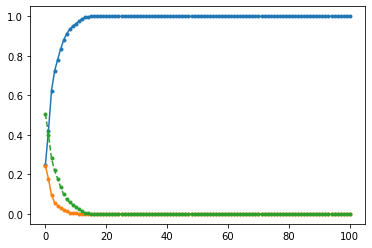

In [15]:
plt.plot(BOC_nolearing.correct_ratio,'.-')
plt.plot(BOC_nolearing.incorrect_ratio,'.-')
plt.plot(BOC_nolearing.undecide_ratio,'.--')
plt.show()

In [23]:
from IPython import display

In [24]:
display.set_matplotlib_formats('svg')

In [34]:
def plot_ratios(BOC1, BOC2, output=None):
    fig,ax=plt.subplots(2,1,sharex=True, figsize=[5,6])
    ax[0].plot(BOC1.correct_ratio,'.-', label='Correct Gene Ratio')
    ax[0].plot(BOC1.incorrect_ratio,'.-', label='Incorrect Gene Ratio')
    ax[0].plot(BOC1.undecide_ratio,'.-', label='Undecided Gene Ratio')
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_ylim(-0.08,1.08)
    ax[0].legend()
    ax[0].set_title("With Learning Step, Spikeness={}".format(BOC1.spikeness))
    ax[1].plot(BOC2.correct_ratio,'.-', label='Correct Gene Ratio')
    ax[1].plot(BOC2.incorrect_ratio,'.-', label='Incorrect Gene Ratio')
    ax[1].plot(BOC2.undecide_ratio,'.-', label='Undecided Gene Ratio')
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_ylim(-0.08,1.08)
    ax[1].set_xlabel("Generations")
    ax[1].set_title("Without Learning Step, Spikeness={}".format(BOC1.spikeness))
    if output:
        plt.savefig(output,dpi=200,transparent=True,bbox_inches='tight')
    plt.show()

In [16]:
BOC1 = BaldwinOptimize_Coding(initial_points,100)
BOC1_nolearing = BaldwinOptimize_Coding(initial_points,100)
for i in tqdm(range(50)):
    BOC1.evolve(alpha=1,beta=19)
    BOC1_nolearing.evolve(alpha=1,beta=0)

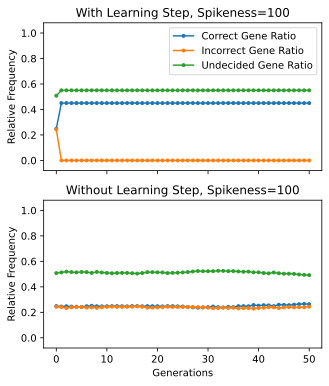

In [35]:
plot_ratios(BOC1, BOC1_nolearing)

In [17]:
BOC2 = BaldwinOptimize_Coding(initial_points,1000)
BOC2_nolearing = BaldwinOptimize_Coding(initial_points,1000)
for i in tqdm(range(50)):
    BOC2.evolve(alpha=1,beta=19)
    BOC2_nolearing.evolve(alpha=1,beta=0)

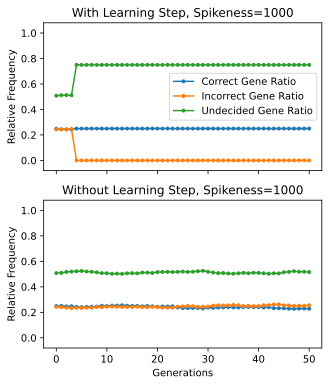

In [36]:
plot_ratios(BOC2, BOC2_nolearing)

In [18]:
BOC3 = BaldwinOptimize_Coding(initial_points,1e6)
BOC3_nolearing = BaldwinOptimize_Coding(initial_points,1e6)
for i in tqdm(range(50)):
    BOC3.evolve(alpha=1,beta=19)
    BOC3_nolearing.evolve(alpha=1,beta=0)

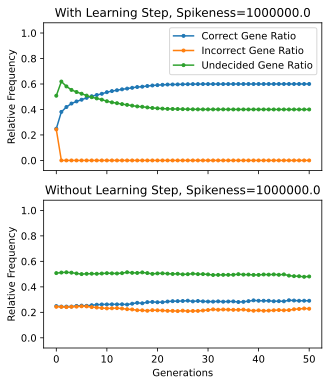

In [37]:
plot_ratios(BOC3, BOC3_nolearing)

In [19]:
BOC4 = BaldwinOptimize_Coding(initial_points,1e10)
BOC4_nolearing = BaldwinOptimize_Coding(initial_points,1e10)
for i in tqdm(range(50)):
    BOC4.evolve(alpha=1,beta=19)
    BOC4_nolearing.evolve(alpha=1,beta=0)

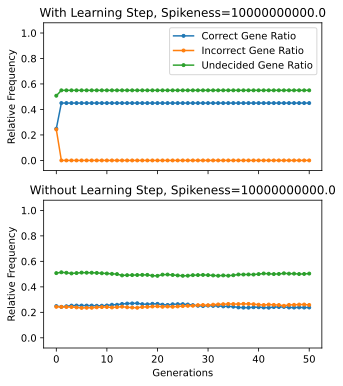

In [38]:
plot_ratios(BOC4, BOC4_nolearing)

In [20]:
BOC5 = BaldwinOptimize_Coding(initial_points,10)
BOC5_nolearing = BaldwinOptimize_Coding(initial_points,10)
for i in tqdm(range(50)):
    BOC5.evolve(alpha=1,beta=19)
    BOC5_nolearing.evolve(alpha=1,beta=0)

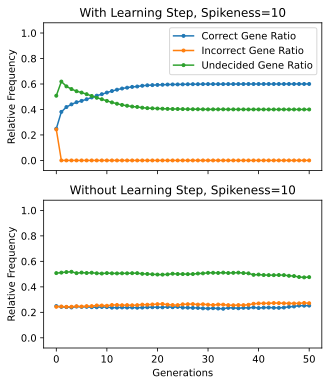

In [100]:
plot_ratios(BOC5, BOC5_nolearing, output="10Spikeness.png")

In [21]:
BOC6 = BaldwinOptimize_Coding(initial_points,5)
BOC6_nolearing = BaldwinOptimize_Coding(initial_points,5)
for i in tqdm(range(50)):
    BOC6.evolve(alpha=1,beta=19)
    BOC6_nolearing.evolve(alpha=1,beta=0)

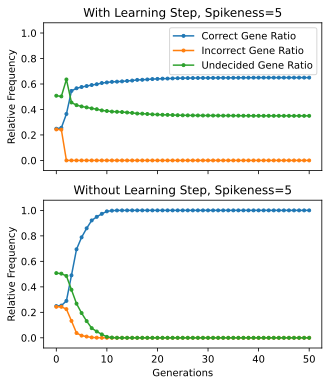

In [40]:
plot_ratios(BOC6, BOC6_nolearing)

In [22]:
BOC7 = BaldwinOptimize_Coding(initial_points,1.5)
BOC7_nolearing = BaldwinOptimize_Coding(initial_points,1.5)
for i in tqdm(range(50)):
    BOC7.evolve(alpha=1,beta=19)
    BOC7_nolearing.evolve(alpha=1,beta=0)

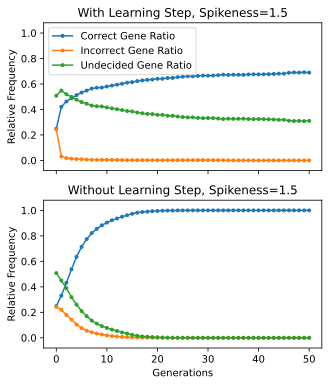

In [41]:
plot_ratios(BOC7, BOC7_nolearing)

In [42]:
BOC8 = BaldwinOptimize_Coding(initial_points,1.2)
BOC8_nolearing = BaldwinOptimize_Coding(initial_points,1.2)
for i in tqdm(range(50)):
    BOC8.evolve(alpha=1,beta=19)
    BOC8_nolearing.evolve(alpha=1,beta=0)

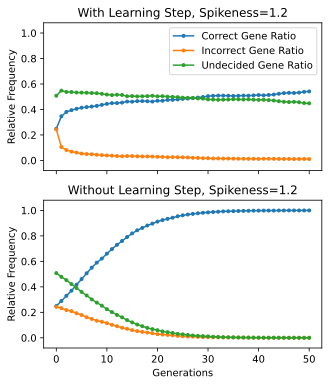

In [97]:
plot_ratios(BOC8, BOC8_nolearing, output="1_2Spikeness.png")

In [44]:
BOC9 = BaldwinOptimize_Coding(initial_points,2.5)
BOC9_nolearing = BaldwinOptimize_Coding(initial_points,2.5)
for i in tqdm(range(50)):
    BOC9.evolve(alpha=1,beta=19)
    BOC9_nolearing.evolve(alpha=1,beta=0)

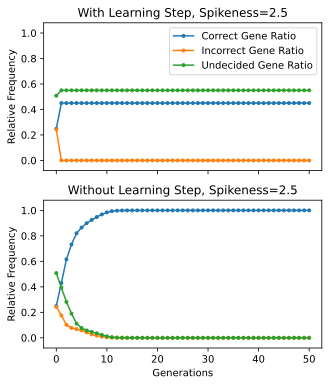

In [98]:
plot_ratios(BOC9, BOC9_nolearing,output="2_5Spikeness.png")

In [46]:
BOC10 = BaldwinOptimize_Coding(initial_points,7.5)
BOC10_nolearing = BaldwinOptimize_Coding(initial_points,7.5)
for i in tqdm(range(50)):
    BOC10.evolve(alpha=1,beta=19)
    BOC10_nolearing.evolve(alpha=1,beta=0)

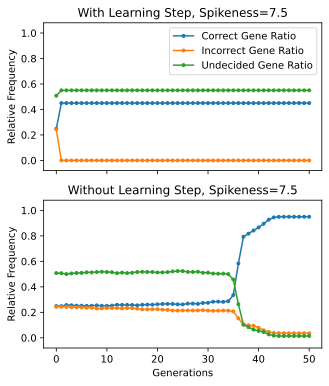

In [99]:
plot_ratios(BOC10, BOC10_nolearing,output="7_5Spikeness.png")